In [2]:
## reproduce figure 2C from "CellBox: Interpretable Machine Learning for 
## Perturbation Biology with Application to the Design of Cancer Combination Therapy"
## Yuan et al., 2021, Cell Systems 12, 128–140
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import ast 
from matplotlib.lines import Line2D

In [3]:
#change to your own data directory
y_hat = pd.read_csv('../data/random_partition_average_testhat_929.csv')
y = pd.read_csv('../data/expert.csv')

In [4]:
# remove the unname column
y_hat = y_hat.iloc[:,1:]
y = y.iloc[:,1:]

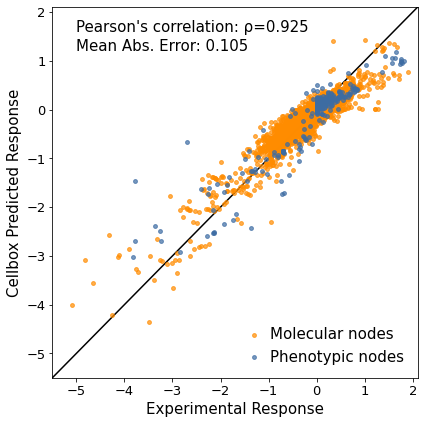

In [13]:
#ax = plt.subplot2grid((14, 2), (7, 0), rowspan=8)
x_all = y.values.flatten()
y_all = y_hat.values.flatten()

x_prot = y.iloc[:,0:82]
y_prot = y_hat.iloc[:,0:82]
x_pheno = y.iloc[:,82:87]
y_pheno = y_hat.iloc[:,82:87]
plt.scatter(x_prot, y_prot, s = 15, alpha = 0.7, color="darkorange",zorder=3)
#plt.scatter(x_prot, y_prot, s = 15, alpha = 0.7, color="#FC5A5B",zorder=3)
plt.scatter(x_pheno, y_pheno, s = 15, alpha = 0.7, color="#3D6CA3",zorder=4)
#plt.scatter(x_pheno, y_pheno, s = 15, alpha = 0.7, color="#FECD7F",zorder=4)
plt.legend(["Molecular nodes","Phenotypic nodes"], loc="lower right", frameon=False,
          handletextpad=0.1,prop={'size': 15})
plt.plot([-10, 10], [-10, 10], c = 'white', alpha = 0, ls = '--')
#plt.scatter(x_all, y_all, s = 15, alpha = 0.6)
#sns.regplot(x_all, y_all, scatter_kws={'s': 15, 'alpha': 0},line_kws={'color': 'black', 'alpha': 1})

plt.plot( [-6,3],[-6,3],color='black')
#sns.regplot(x_all, y_all, scatter_kws={'s': 15, 'alpha': 0},line_kws={'color': '#F18A64', 'alpha': 1})

plt.xticks(np.arange(-6,3),size=13)
plt.yticks(np.arange(-6,3),size=13)
#plt.grid(True, which='both')

ll = [-5.5, 2.1]
plt.xlim(ll)
plt.ylim(ll)

r = np.corrcoef(x_all, y_all)[0][1]
mae = np.mean(np.absolute(x_all-y_all))
plt.text(x = -5, y= 1.6, s='Pearson\'s correlation: ρ=%1.3f'%r,
        size = 15)
plt.text(x = -5, y= 1.2, s='Mean Abs. Error: %1.3f'%mae,
        size = 15)
plt.xlabel('Experimental Response',size=15)
plt.ylabel('Cellbox Predicted Response',size=15)
plt.rcParams['figure.figsize'] = 6, 6
plt.tight_layout()
plt.savefig('Cellbox_RF.pdf')
#plt.title("Pearson’s correlation", 
#          weight='bold', size=13)

#plt.text(-0.13,1.06,'C', weight='bold',transform=ax.transAxes)


In [6]:
mae = np.mean(np.absolute(x_all-y_all))

In [9]:
np.mean(mae)

0.10474645962852557